In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
import bs4
from urllib.request import urlopen
import time
import seaborn as sns

In [2]:
df = pd.read_csv("output(1-45) (1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1331 non-null   int64 
 1   company      1331 non-null   object
 2   Designation  1331 non-null   object
 3   title        1331 non-null   object
 4   rating       1331 non-null   object
 5   review       1331 non-null   object
 6   date         1331 non-null   object
 7   Place        1331 non-null   object
dtypes: int64(1), object(7)
memory usage: 83.3+ KB


In [36]:
df['ratings'] = df['rating'].str[-12:-9]

'<button aria-describedby="cmp-rating-tooltip-1e9aclnuopifv800" aria-label="5.0 out of 5 stars." class="css-1c33izo e1wnkr790">5.0</button>'

In [22]:
df['rating'][0]

'<button aria-describedby="cmp-rating-tooltip-1e9aclnuopifv800" aria-label="5.0 out of 5 stars." class="css-1c33izo e1wnkr790">5.0</button>'

In [40]:
df = df.drop(['rating'], axis=1)

In [41]:
df

,Unnamed: 0,company,Designation,title,review,date,Place,ratings
0,1,Meta,Software Engineer (Former Employee),A great place to learn and improve oneself,Working at Facebook exposes you to problems se...,"May 27, 2020",New York,5.0
1,2,Meta,Software Engineer (Former Employee),Becoming worse,I have joined the company since 2018 and enjoy...,"April 24, 2022",California,3.0
2,3,Meta,PM (Former Employee),"Standard big-tech job, with the pros and cons ...","Great if you're looking for a big tech job, le...","April 24, 2022","Menlo Park, CA",5.0
3,4,Meta,Program Manager (Former Employee),Productive and fun environment,It is a great company to work for. I had a pre...,"April 21, 2022","Seattle, WA",5.0
4,5,Meta,Manager (Current Employee),Love working at Meta!,I’ve been at Meta (previously Facebook) for a ...,"April 7, 2022","Austin, TX",5.0
...,...,...,...,...,...,...,...,...
1326,1334,Select Specialty Hospital,Tech (Former Employee),Hostile environment,Over all I absolutely loved working at Select ...,"March 19, 2022","Des Moines, IA",2.0
1327,1335,Select Specialty Hospital,Certified Nursing Assistant (CNA) (Current Emp...,Busy and overworked staff,Over worked. No support. Managers only care ab...,"March 18, 2022","Fort Myers, FL",1.0
1328,1336,Select Specialty Hospital,HS (Current Employee),Select Specialty Hospital,Since our new management team arrived in 2021 ...,"March 12, 2022","Hampton, VA",5.0
1329,1337,Select Specialty Hospital,Certified Nurse Assistant (Former Employee),No support hardly,No support at all from the management. They do...,"March 10, 2022","Columbus, OH",2.0


In [44]:
df.groupby(['company','ratings']).size()

company           ratings
Accenture         1.0        2
                  3.0        3
                  4.0        8
                  5.0        8
Adventist Health  2.0        5
                            ..
nativo            2.0        1
                  3.0        1
                  5.0        1
reddit            3.0        2
                  5.0        2
Length: 322, dtype: int64

In [45]:
df['Date'] = pd.to_datetime(df['date'])

In [48]:
df.groupby(['Date']).size()

Date
2013-10-12     1
2013-10-29     1
2014-01-05     1
2014-02-04     1
2014-03-30     1
              ..
2022-04-20    31
2022-04-21    53
2022-04-22    36
2022-04-23    28
2022-04-24    44
Length: 482, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1331 non-null   int64         
 1   company      1331 non-null   object        
 2   Designation  1331 non-null   object        
 3   title        1331 non-null   object        
 4   review       1331 non-null   object        
 5   date         1331 non-null   object        
 6   Place        1331 non-null   object        
 7   ratings      1331 non-null   object        
 8   Date         1331 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 93.7+ KB


In [52]:
df["Year"]= df['Date'].dt.year

In [54]:
df.groupby(['Year']).size()

Year
2013      2
2014      6
2015      3
2016      3
2017     18
2018     32
2019     78
2020     99
2021    246
2022    844
dtype: int64

In [55]:
df

,Unnamed: 0,company,Designation,title,review,date,Place,ratings,Date,Year
0,1,Meta,Software Engineer (Former Employee),A great place to learn and improve oneself,Working at Facebook exposes you to problems se...,"May 27, 2020",New York,5.0,2020-05-27,2020
1,2,Meta,Software Engineer (Former Employee),Becoming worse,I have joined the company since 2018 and enjoy...,"April 24, 2022",California,3.0,2022-04-24,2022
2,3,Meta,PM (Former Employee),"Standard big-tech job, with the pros and cons ...","Great if you're looking for a big tech job, le...","April 24, 2022","Menlo Park, CA",5.0,2022-04-24,2022
3,4,Meta,Program Manager (Former Employee),Productive and fun environment,It is a great company to work for. I had a pre...,"April 21, 2022","Seattle, WA",5.0,2022-04-21,2022
4,5,Meta,Manager (Current Employee),Love working at Meta!,I’ve been at Meta (previously Facebook) for a ...,"April 7, 2022","Austin, TX",5.0,2022-04-07,2022
...,...,...,...,...,...,...,...,...,...,...
1326,1334,Select Specialty Hospital,Tech (Former Employee),Hostile environment,Over all I absolutely loved working at Select ...,"March 19, 2022","Des Moines, IA",2.0,2022-03-19,2022
1327,1335,Select Specialty Hospital,Certified Nursing Assistant (CNA) (Current Emp...,Busy and overworked staff,Over worked. No support. Managers only care ab...,"March 18, 2022","Fort Myers, FL",1.0,2022-03-18,2022
1328,1336,Select Specialty Hospital,HS (Current Employee),Select Specialty Hospital,Since our new management team arrived in 2021 ...,"March 12, 2022","Hampton, VA",5.0,2022-03-12,2022
1329,1337,Select Specialty Hospital,Certified Nurse Assistant (Former Employee),No support hardly,No support at all from the management. They do...,"March 10, 2022","Columbus, OH",2.0,2022-03-10,2022


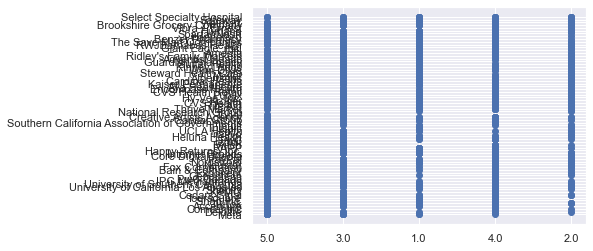

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
rating=[]
company=[]
for d in df['ratings']:
    rating.append(d)
for e in df['company']:
    company.append(e)
sns.set(color_codes=True)
plt.scatter(rating,company)
plt.show()

In [59]:
count=df['company'].value_counts()

Text(0, 0.5, 'Count of Positions of specific field')

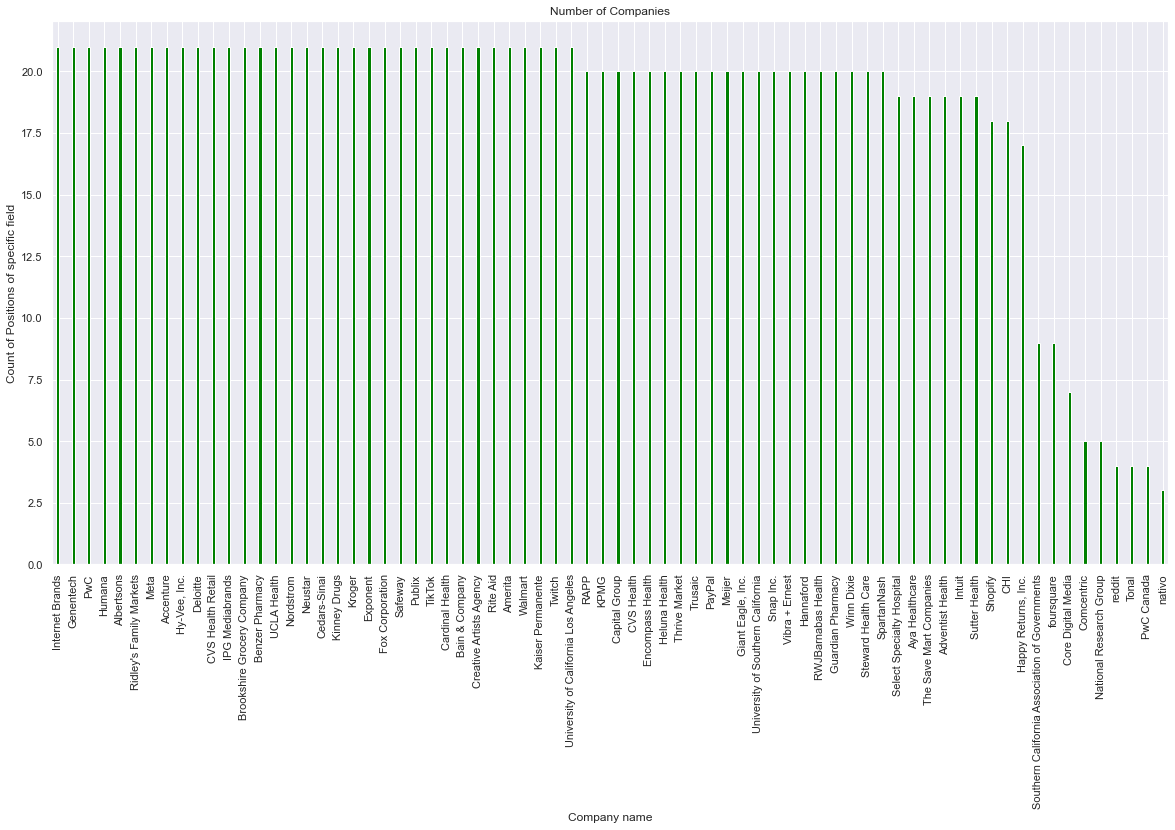

In [62]:
count.plot(kind='bar',title='Number of Companies', figsize=(20,10), width = 0.2,color='green')
plt.xlabel('Company name')
plt.ylabel('Count of Positions of specific field')

In [67]:
comfort=[]
for ele in df['rating']:
    ele=ele.text
    if float(ele)>3:
        comfort.append("Satisfied")
    elif float(ele)>1:
        comfort.append('Neutral')
    else:
        comfort.append('Dissatisfied')
df['Comfort']=comfort

AttributeError: 'float' object has no attribute 'text'

In [64]:
df["rating"] = pd.to_numeric(df["ratings"])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1331 non-null   int64         
 1   company      1331 non-null   object        
 2   Designation  1331 non-null   object        
 3   title        1331 non-null   object        
 4   review       1331 non-null   object        
 5   date         1331 non-null   object        
 6   Place        1331 non-null   object        
 7   ratings      1331 non-null   object        
 8   Date         1331 non-null   datetime64[ns]
 9   Year         1331 non-null   int64         
 10  rating       1331 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 114.5+ KB


In [70]:
comfort=[]
for ele in df['ratings']:
    ele=ele.text
    if float(ele)>3.0:
        comfort.append("Satisfied")
    elif float(ele)>1:
        comfort.append('Neutral')
    else:
        comfort.append('Dissatisfied')
df['Comfort']=comfort

AttributeError: 'str' object has no attribute 'text'

In [73]:
df['state']= df['Place'].str[-3:-1]

In [74]:
df

,Unnamed: 0,company,Designation,title,review,date,Place,ratings,Date,Year,rating,state
0,1,Meta,Software Engineer (Former Employee),A great place to learn and improve oneself,Working at Facebook exposes you to problems se...,"May 27, 2020",New York,5.0,2020-05-27,2020,5.0,rk
1,2,Meta,Software Engineer (Former Employee),Becoming worse,I have joined the company since 2018 and enjoy...,"April 24, 2022",California,3.0,2022-04-24,2022,3.0,ia
2,3,Meta,PM (Former Employee),"Standard big-tech job, with the pros and cons ...","Great if you're looking for a big tech job, le...","April 24, 2022","Menlo Park, CA",5.0,2022-04-24,2022,5.0,CA
3,4,Meta,Program Manager (Former Employee),Productive and fun environment,It is a great company to work for. I had a pre...,"April 21, 2022","Seattle, WA",5.0,2022-04-21,2022,5.0,WA
4,5,Meta,Manager (Current Employee),Love working at Meta!,I’ve been at Meta (previously Facebook) for a ...,"April 7, 2022","Austin, TX",5.0,2022-04-07,2022,5.0,TX
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,1334,Select Specialty Hospital,Tech (Former Employee),Hostile environment,Over all I absolutely loved working at Select ...,"March 19, 2022","Des Moines, IA",2.0,2022-03-19,2022,2.0,IA
1327,1335,Select Specialty Hospital,Certified Nursing Assistant (CNA) (Current Emp...,Busy and overworked staff,Over worked. No support. Managers only care ab...,"March 18, 2022","Fort Myers, FL",1.0,2022-03-18,2022,1.0,FL
1328,1336,Select Specialty Hospital,HS (Current Employee),Select Specialty Hospital,Since our new management team arrived in 2021 ...,"March 12, 2022","Hampton, VA",5.0,2022-03-12,2022,5.0,VA
1329,1337,Select Specialty Hospital,Certified Nurse Assistant (Former Employee),No support hardly,No support at all from the management. They do...,"March 10, 2022","Columbus, OH",2.0,2022-03-10,2022,2.0,OH
